Point 1/100: 10:24:45 UTC | Lat 50.25, Lon -72.78
Point 2/100: 10:24:55 UTC | Lat 50.08, Lon -71.85
Point 3/100: 10:25:06 UTC | Lat 49.89, Lon -70.84
Point 4/100: 10:25:16 UTC | Lat 49.70, Lon -69.92
Point 5/100: 10:25:26 UTC | Lat 49.51, Lon -69.02
Point 6/100: 10:25:37 UTC | Lat 49.29, Lon -68.03
Point 7/100: 10:25:47 UTC | Lat 49.08, Lon -67.14
Point 8/100: 10:25:58 UTC | Lat 48.84, Lon -66.16
Point 9/100: 10:26:08 UTC | Lat 48.62, Lon -65.29
Point 10/100: 10:26:19 UTC | Lat 48.36, Lon -64.34
Point 11/100: 10:26:29 UTC | Lat 48.12, Lon -63.48
Point 12/100: 10:26:39 UTC | Lat 47.88, Lon -62.63
Point 13/100: 10:26:49 UTC | Lat 47.63, Lon -61.79
Point 14/100: 10:27:00 UTC | Lat 47.34, Lon -60.88
Point 15/100: 10:27:10 UTC | Lat 47.07, Lon -60.05
Point 16/100: 10:27:20 UTC | Lat 46.80, Lon -59.24
Point 17/100: 10:27:31 UTC | Lat 46.49, Lon -58.35
Point 18/100: 10:27:41 UTC | Lat 46.21, Lon -57.56
Point 19/100: 10:27:51 UTC | Lat 45.91, Lon -56.77
Point 20/100: 10:28:01 UTC | Lat 45.61, 

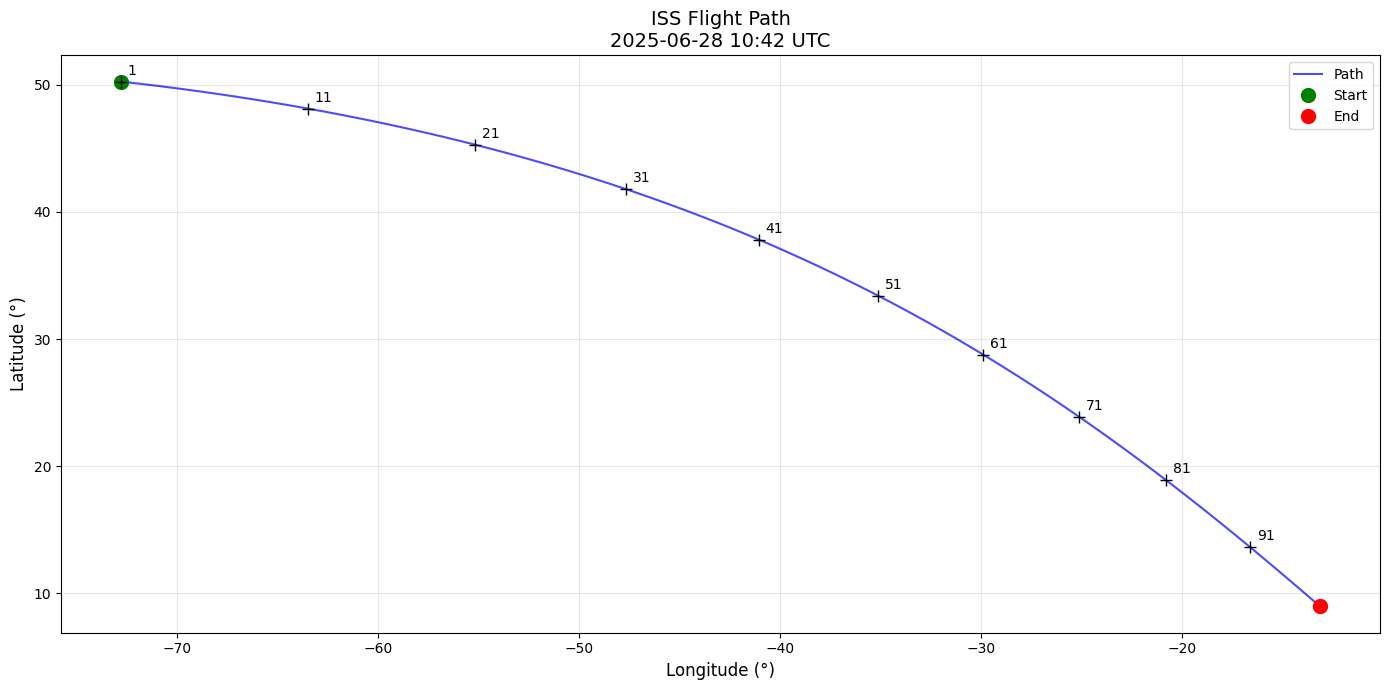

Data saved as iss_data.txt


In [2]:
!pip install requests matplotlib

import requests
import time
import matplotlib.pyplot as plt
from datetime import datetime

url = "https://api.wheretheiss.at/v1/satellites/25544"
timestamps, latitudes, longitudes = [], [], []

print("Collecting ISS location data (will take ~17 minutes)...")
for i in range(100):
    try:
        response = requests.get(url, timeout=10)
        data = response.json()
        latitudes.append(data['latitude'])
        longitudes.append(data['longitude'])
        ts = datetime.utcfromtimestamp(data['timestamp']).strftime('%H:%M:%S')
        print(f"Point {i+1}/100: {ts} UTC | Lat {data['latitude']:.2f}, Lon {data['longitude']:.2f}")
        time.sleep(10)
    except Exception as e:
        print(f"Error: {e}")
        time.sleep(10)

plt.figure(figsize=(14, 7))
plt.plot(longitudes, latitudes, 'b-', alpha=0.7, label='Path')
plt.plot(longitudes[0], latitudes[0], 'go', markersize=10, label='Start')
plt.plot(longitudes[-1], latitudes[-1], 'ro', markersize=10, label='End')

for i in range(0, len(longitudes), 10):
    plt.plot(longitudes[i], latitudes[i], 'k+', markersize=8)
    plt.annotate(f"{i+1}", (longitudes[i], latitudes[i]),
                 xytext=(5,5), textcoords='offset points')

plt.title('ISS Flight Path\n' + datetime.now().strftime('%Y-%m-%d %H:%M UTC'),
          fontsize=14)
plt.xlabel('Longitude (°)', fontsize=12)
plt.ylabel('Latitude (°)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

plt.savefig('iss_path.png', dpi=120)
print("\nPlot saved as iss_path.png")
plt.show()

with open('iss_data.txt', 'w') as f:
    f.write("Timestamp,Latitude,Longitude\n")
    for i, (lat, lon) in enumerate(zip(latitudes, longitudes)):
        f.write(f"{timestamps[i] if i < len(timestamps) else 'N/A'},{lat},{lon}\n")

print("Data saved as iss_data.txt")